# Metrics I will use to measure solutions performance
The goal of this notebook is to define which metrics to use to measure the performance of the solutions I made.

## Toxicity value

### Detoxify

https://pypi.org/project/detoxify/

In [ ]:
# ! pip install detoxify

In [7]:
import pandas as pd

data = pd.read_csv('../data/interim/test.csv')
data.head()

,reference,translation
0,Fucking A your mom likes lan.,my mom loves you.
1,We'll be fucking pariahs.,we're going to be completely unnerved.
2,"I'm done, Live Dead.","I'm through, Dead Meat."
3,What is this place? A fucking vampire secret h...,that's a secret vampire headquarters.
4,Just a silly dream and nothing more,# Just a silky dream and nothing more


In [8]:
from detoxify import Detoxify

results = Detoxify('unbiased').predict(data['reference'][4])

In [9]:
results['toxicity']

0.65598243

In [37]:
results = Detoxify('original').predict(data['reference'][4])

In [39]:
results['toxicity']

0.12325273

Unbiased seems more precise to me.

In [43]:
X = list(data.reference[0:200])
y = list(data.translation[0:200])

In [44]:
ref_tox = Detoxify('unbiased').predict(X)
trn_tox = Detoxify('unbiased').predict(y)

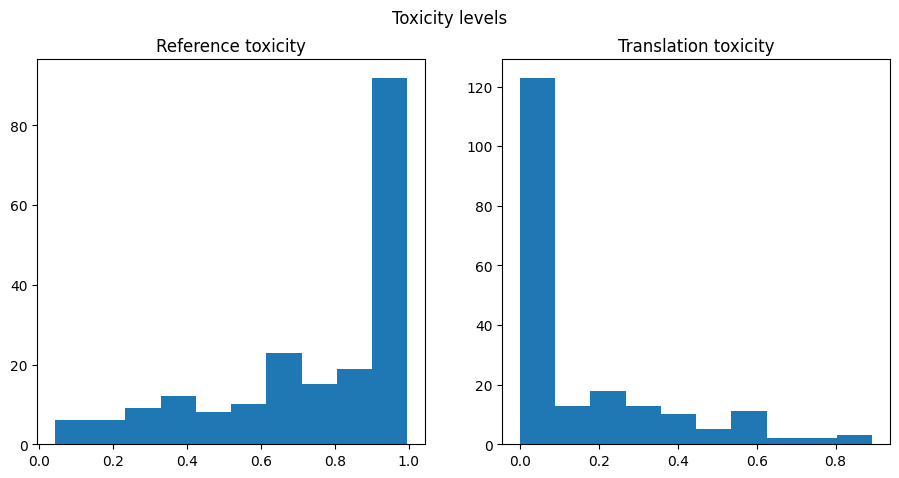

In [47]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
fig.suptitle('Toxicity levels')

ax1.hist(ref_tox['toxicity'])
ax1.set_title('Reference toxicity')
ax2.hist(trn_tox['toxicity'])
ax2.set_title('Translation toxicity')
plt.show()

Not as accurate as the original data, but enough to determine if the algorithms work. However, the algorithm takes a very long time to run and predicting the entire test set takes for about 3 hours.

I tried other ways, but they worked just as long or were outdated, so I'll stick with this metric, but will only measure the coefficient on a some part of the data.

In [12]:
from tqdm import tqdm

size = 2000
tox_values = []
detox = Detoxify('unbiased')

for i in tqdm(range(size)):
    tox_values.append(detox.predict(data.reference[i])['toxicity'])
    
print('Approximate toxicity of reference:', sum(tox_values) / len(tox_values))

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:38<00:00,  7.19it/s]

Approximate toxicity of reference: 0.7367349886898883


In [13]:
from tqdm import tqdm

size = 2000
tox_values = []
detox = Detoxify('unbiased')

for i in tqdm(range(size)):
    tox_values.append(detox.predict(data.translation[i])['toxicity'])
    
print('Approximate toxicity of translation:', sum(tox_values) / len(tox_values))

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:10<00:00,  7.98it/s]

Approximate toxicity of translation: 0.16164738804452644


So, the toxicity value in the dataset was reduced from 0.737 to 0.162

## Similarity value
As given in the dataset, I will use **cosine similarity** to compare the two texts.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = [data.reference[4], data.translation[4]]

count_vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
vector_matrix = count_vectorizer.fit_transform(texts)

cosine_similarity_matrix = cosine_similarity(vector_matrix)

In [6]:
texts

['Just a silly dream and nothing more',
 '# Just a silky dream and nothing more']

In [7]:
cosine_similarity_matrix

array([[1.        , 0.85714286],
       [0.85714286, 1.        ]])

In [8]:
from tqdm import tqdm 

cosine_sims = []

for i in tqdm(range(len(data))):
    texts = [data.reference[i], data.translation[i]]
    vector_matrix = count_vectorizer.fit_transform(texts)

    cosine_sims.append(cosine_similarity(vector_matrix)[0][1])
    
print("Average similarity:", sum(cosine_sims) / len(cosine_sims))

100%|███████████████████████████████████████████████████████████████████████████| 85352/85352 [02:28<00:00, 573.75it/s]

Average similarity: 0.618790799939764


## Conclusions
1. Approximate toxicity of the reference in the test data is 0.737
2. Approximate toxicity of the translation in the test data is 0.162
3. Average similarity of the test data is 0.619

I will use these metrics to compare performances of other algorithms.